In [92]:
# Importing the libraries we're going to need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# this allows plots to appear directly in the notebook
%matplotlib inline

In [93]:
# Let's setup our fuel consumption data from 2010 to july 2017
fuel = pd.read_csv('Fuel Efficiciency/Fuel_FO_2010-17_lr.csv', sep = ';',index_col=None,encoding='latin-1')
fuel.head(5)

,IN,Train_Bulletin,Sector,DateTime1,Id_Loc,Track_id,Id_Engineer,Id_fireman,Hours,Kilometers,...,id_Type,Type,Traccion,Direction,Id_Model_Loc,Model_Loc,UTC,GTK_T,Net_Ton_Km,Liters_r
0,TREN,32175,N,26/4/2017,5409,1,67.0,252.0,4.63,56.1,...,1,CARGA,S,0,38,GE U20C,UTR,35628557.1,56.1,100.0
1,TREN,32177,N,26/4/2017,11,1,104.0,285.0,2.25,35.1,...,1,CARGA,S,1,9,GE U10B,UTR,21194784.0,14995773.0,100.0
2,TREN,32178,N,26/4/2017,5409,1,67.0,252.0,3.08,56.1,...,1,CARGA,S,1,38,GE U20C,UTR,83729250.0,58905000.0,200.0
3,TREN,32187,N,27/4/2017,6931,1,18.0,286.0,1.75,35.1,...,1,CARGA,S,1,43,HM,UTR,20671794.0,14546844.0,50.0
4,TREN,32188,N,27/4/2017,21,1,72.0,91.0,3.33,56.1,...,1,CARGA,S,0,28,GM,UTR,27692100.0,0.0,100.0


In [144]:
# We're adding a Lts per GTK and since GTK is a very large number we make a second column of GTK in billions
f = fuel
f['Lts_x_GTK'] = ((f['Liters'] * 1000)/ (f['Gross_Ton_km'] / 1000000)).astype(float)
f['GTK_9'] = ((f['Gross_Ton_km'] / 1000000000)).astype(float)
len_tot = len(f)
# We want to show the distribution of the unit trains in the East with simple traction
f = f[(f.Sector == 'E') & (f.Liters >40) & (f.UTC == 'UTR') & (f.IN == 'TREN') & (f.Gross_Ton_km >0) & (f.Traccion == 'S') & (f.Track_id <=6) & (f.Hours < 48) & (f.Lts_x_GTK < 13000)]

f.groupby(['UTC','Sub_Type','Model_Loc','Track_id']).size()

UTC  Sub_Type               Model_Loc  Track_id
UTR  CARGA GENERAL          GE C23EMP  2            797
                                       3            757
                                       4            890
                            GE U10B    2            228
                                       3            719
                                       4            157
                            GE U20C    2           3993
                                       3           3757
                                       4           3838
                            GM         2            604
                                       3            880
                                       4            496
     DERIVADOS DE PETROLEO  GE C23EMP  2            249
                                       3            251
                                       4            236
                            GE U10B    2             67
                                       3             83


In [145]:
# We are showing more than 28% of the total data
len(f)/ len_tot

0.2830438213360895

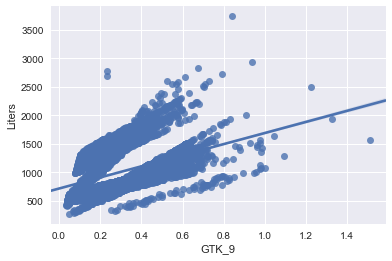

In [95]:
# Is there a direct linear relationship between GTK and Liters in these trains
sns.regplot(y="Liters", x="GTK_9", data=f, fit_reg = True)

There is no direct linear relationship, but there seems to be linear patterns within the relationship

In [96]:
# Let's use all the data again
f= fuel
f['Lts_x_GTK'] = ((f['Liters'] * 1000)/ (f['Gross_Ton_km'] / 1000000)).astype(float)
f['GTK_9'] = ((f['Gross_Ton_km'] / 1000000000)).astype(float)
# create six dummy variables for track_id using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(f.Track_id, prefix='SD').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
f = pd.concat([f, area_dummies], axis=1)

# create six dummy variables for Locomotive Type using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(f.Id_Model_Loc, prefix='MOD').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
f = pd.concat([f, area_dummies], axis=1)


# create six dummy variables for Train Type using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(f.Id_Sub_Type, prefix='TRN').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
f = pd.concat([f, area_dummies], axis=1)

# create a new Series called Tract - Number of Locomotives
f['Tract'] = f.Traccion.map({'S':1,'M':0})

# create a new Series called IsUnit
f['IsUnit'] = f.UTC.map({'UTR':1,'NUT':0,'PAS':-1})

f.head()

,IN,Train_Bulletin,Sector,DateTime1,Id_Loc,Track_id,Id_Engineer,Id_fireman,Hours,Kilometers,...,TRN_3,TRN_4,TRN_5,TRN_6,TRN_8,TRN_9,TRN_10,TRN_11,Tract,IsUnit
0,TREN,32175,N,26/4/2017,5409,1,67.0,252.0,4.63,56.1,...,0,0,0,0,0,0,0,0,1,1
1,TREN,32177,N,26/4/2017,11,1,104.0,285.0,2.25,35.1,...,0,0,0,0,0,0,0,0,1,1
2,TREN,32178,N,26/4/2017,5409,1,67.0,252.0,3.08,56.1,...,0,0,0,0,0,0,0,0,1,1
3,TREN,32187,N,27/4/2017,6931,1,18.0,286.0,1.75,35.1,...,0,0,0,0,0,0,0,0,1,1
4,TREN,32188,N,27/4/2017,21,1,72.0,91.0,3.33,56.1,...,0,0,0,0,0,0,0,0,1,1


In [97]:
#f.dtypes

In [98]:
# import other necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression

In [174]:
#choose the predictor columns (X) with all the predictors and the dependent variable (y) Liters
feature_cols = ['GTK_9', 'Hours', 'Kilometers', 'IsUnit', 'Tract','SD_2', 'SD_3', 'SD_4', 'SD_5', 'SD_6', 
                'MOD_10', 'MOD_28', 'MOD_38', 'MOD_40', 'MOD_42', 'MOD_43', 
                'TRN_2', 'TRN_3', 'TRN_4', 'TRN_5', 'TRN_6', 'TRN_8', 'TRN_9', 'TRN_10', 'TRN_11']
X = f[feature_cols]
y = f.Liters


In [175]:
# Separate train and test set
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.33, random_state = 5)


In [176]:
# This creates a LinearRegression object with all the variables
lm = LinearRegression()
lm.fit(X_train, Y_train)

# print coefficients
#list(zip(feature_cols, lm.coef_))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [177]:
# Import regression modules
# ols - stands for Ordinary least squares
import statsmodels.api as sm
from statsmodels.formula.api import ols

# The thing inside the "quotes" is called a formula
m = ols('Liters ~ GTK_9 + Hours + Kilometers + IsUnit + Tract + SD_2 + SD_3 + SD_4 + SD_5 + SD_6 + MOD_10 + MOD_28 + MOD_38 + MOD_40 + MOD_42 + MOD_43 + TRN_2 + TRN_3 + TRN_4 + TRN_5 + TRN_6 + TRN_8 + TRN_9 + TRN_10 + TRN_11 ',f).fit()
#print (m.summary())

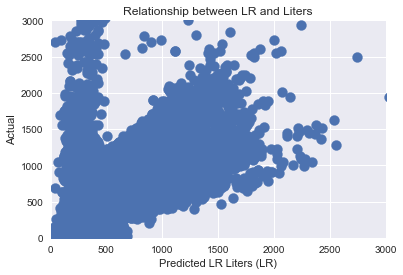

In [178]:
# Is the relationship linear
plt.scatter(m.fittedvalues, f.Liters)
plt.xlim( 0, 3000 ) 
plt.ylim( 0, 3000 ) 
plt.xlabel("Predicted LR Liters (LR)")
plt.ylabel("Actual")
plt.title("Relationship between LR and Liters")

We can perform best subset selection by identifying the best model that contains a given number of predictors, where **best** is quantified using RSS. We'll define a helper function to outputs the best set of variables for
each model size:

In [103]:
# The following four functions are a python adaptation of ISL p. 248-251 by R. Jordan Crouser at Smith College found in:
#http://www.science.smith.edu/~jcrouser/SDS293/labs/lab9/Lab%209%20-%20Subset%20Selection%20in%20Python.pdf
def processSubset(feature_set, X_train, y_train, X_test, y_test):
    
# Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train,X_train[list(feature_set)])
    regr = model.fit()
# We calculate the RSS with respect to the test data
    RSS = ((regr.predict(X_test[list(feature_set)]) - y_test) ** 2).sum()
    
    return {"model":regr, "RSS":RSS}



# Forward Stepwise Selection
We can also use a similar approach to perform forward stepwise
or backward stepwise selection, using a slight modification of the functions we defined above:

In [104]:
def forward(predictors, X_train, y_train, X_test, y_test):
    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_train.columns if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p], X_train, y_train, X_test, y_test))
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS'].argmin()]
    toc = time.time()
#    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
          # Return the best model, along with some other useful information about the model
    return best_model


In [105]:
#choose the predictor columns (X) and the dependent variable (y)
feature_cols = ['GTK_9', 'Hours', 'Kilometers', 'IsUnit', 'Tract','SD_2', 'SD_3', 'SD_4', 'SD_5', 'SD_6', 
                'MOD_10', 'MOD_28', 'MOD_38', 'MOD_40', 'MOD_42', 'MOD_43', 
                'TRN_2', 'TRN_3', 'TRN_4', 'TRN_5', 'TRN_6', 'TRN_8', 'TRN_9', 'TRN_10', 'TRN_11']

X = f[feature_cols]
y = f.Liters

# Separate train and test set
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.33, random_state = 5)



In [106]:
modelf_train = pd.DataFrame(columns=["RSS", "model"])
tic = time.time()
predictors = []
for i in range(1,len(X_train.columns)+1):
#    modelf_train.loc[i] = forward(predictors, X[train], y[train]["Liters"], X[test], y[test]["Liters"])
    modelf_train.loc[i] = forward(predictors, X_train, Y_train, X_test, Y_test)
    predictors = modelf_train.loc[i]["model"].model.exog_names
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Total elapsed time: 12.846490859985352 seconds.


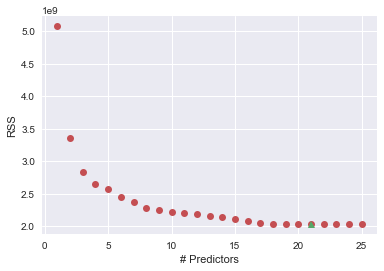

In [107]:
plt.plot(modelf_train["RSS"], "or")
plt.xlabel('# Predictors')
plt.ylabel('RSS')
plt.plot(modelf_train["RSS"].argmin(), modelf_train["RSS"].min(), "g^")

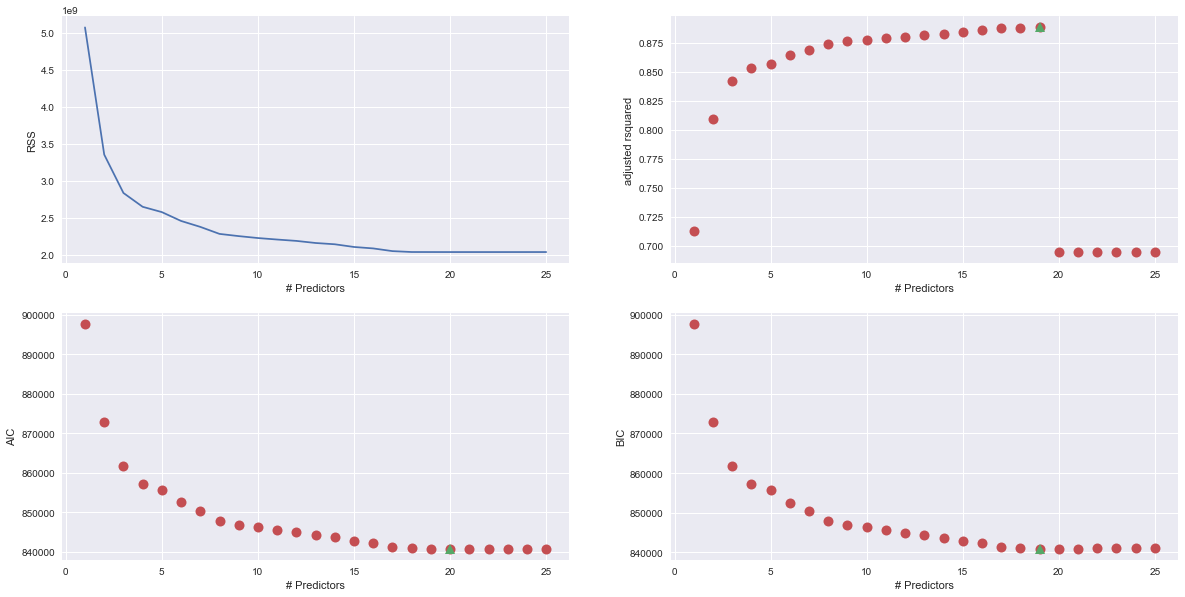

In [108]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot the line of RSS which monotonically decreases as Predictors Increase

plt.plot(modelf_train["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
rsquared = modelf_train.apply(lambda row: row[1].rsquared, axis=1)
plt.subplot(2, 2, 2)
plt.plot(rsquared, "or")
plt.plot(rsquared.argmax(), rsquared.max(), "g^")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic

aic = modelf_train.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic, "or")
plt.plot(aic.argmin(), aic.min(), "g^")
plt.xlabel('# Predictors')
plt.ylabel('AIC')
bic = modelf_train.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic, "or")
plt.plot(bic.argmin(), bic.min(), "g^")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

# Backward Stepwise Selection
We can also use a similar approach to perform backward stepwise selection:

In [109]:
#choose the predictor columns (X) and the dependent variable (y)
feature_cols = ['GTK_9', 'Hours', 'Kilometers', 'IsUnit', 'Tract','SD_2', 'SD_3', 'SD_4', 'SD_5', 'SD_6', 
                'MOD_10', 'MOD_28', 'MOD_38', 'MOD_40', 'MOD_42', 'MOD_43', 
                'TRN_2', 'TRN_3', 'TRN_4', 'TRN_5', 'TRN_6', 'TRN_8', 'TRN_9', 'TRN_10', 'TRN_11']


#feature_cols = ['GTK_9', 'Hours', 'Kilometers', 'SD_2', 'SD_3', 'SD_4', 'SD_5',
#                'MOD_10', 'MOD_28', 'MOD_38', 'MOD_40', 'MOD_42', 'MOD_43', 
#                'TRN_2', 'TRN_4', 'TRN_5', 'TRN_6', 'TRN_8', 'TRN_10', 'TRN_11']
#f = f[(f.TRN_9 == 0) ]
X = f[feature_cols]
y = f.Liters

# Separate train and test set
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.33, random_state = 5)


def backward(predictors, X_train, y_train, X_test, y_test):
    tic = time.time()
    results = []
    for combo in itertools.combinations(predictors, len(predictors)-1):
        #results.append(processSubset(predictors+[p], X_train, y_train, X_test, y_test))
        results.append(processSubset (combo, X_train, y_train, X_test, y_test))
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    toc = time.time()
#    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.") 
    # Return the best model, along with some other useful information about the model
    return best_model




In [110]:
modelb_train = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X_train.columns)))
tic = time.time()
predictors = X_train.columns
while(len(predictors) > 1):
    modelb_train.loc[len(predictors)-1] = backward(predictors, X_train, Y_train, X_test, Y_test)
    predictors = modelb_train.loc[len(predictors)-1]["model"].model.exog_names
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")


Total elapsed time: 22.64979863166809 seconds.


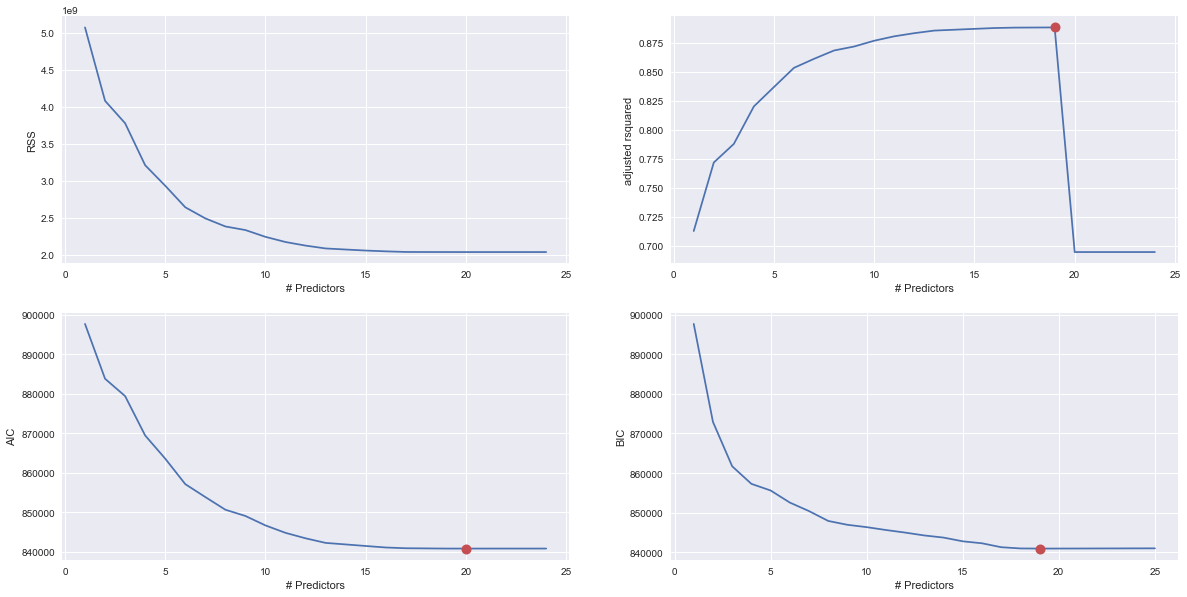

In [111]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(modelb_train["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
rsquared = modelb_train.apply(lambda row: row[1].rsquared, axis=1)
plt.subplot(2, 2, 2)
plt.plot(rsquared)
plt.plot(rsquared.argmax(), rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic

aic = modelb_train.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')
bic = modelf_train.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

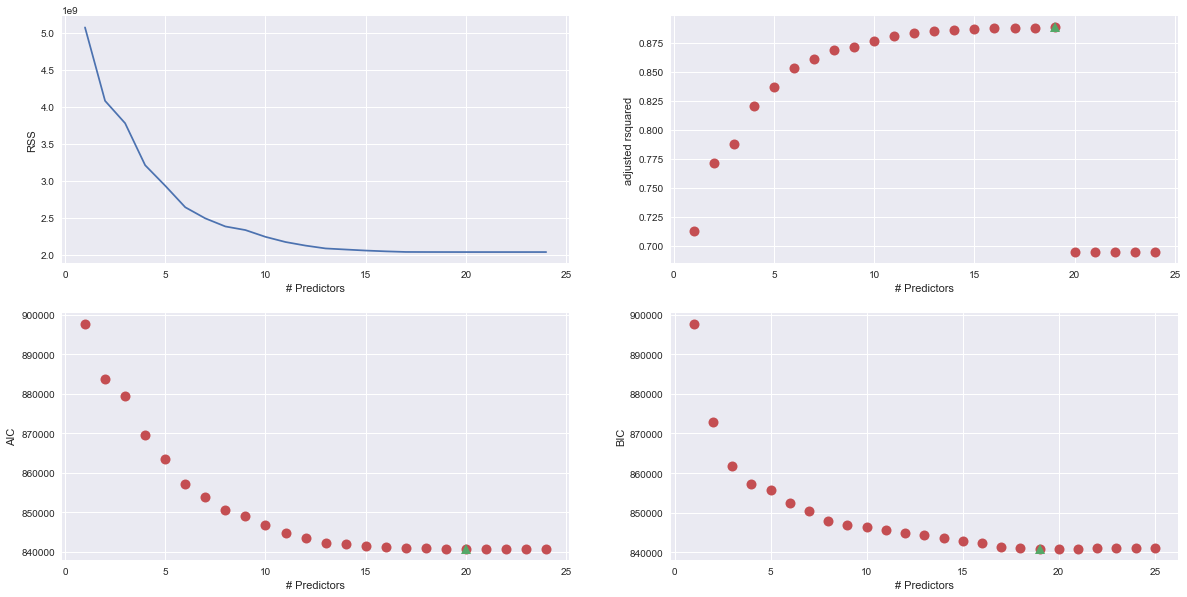

In [112]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot the line of RSS which monotonically decreases as Predictors Increase

plt.plot(modelb_train["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
rsquared = modelb_train.apply(lambda row: row[1].rsquared, axis=1)
plt.subplot(2, 2, 2)
plt.plot(rsquared, "or")
plt.plot(rsquared.argmax(), rsquared.max(), "g^")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic

aic = modelb_train.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic, "or")
plt.plot(aic.argmin(), aic.min(), "g^")
plt.xlabel('# Predictors')
plt.ylabel('AIC')
bic = modelf_train.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic, "or")
plt.plot(bic.argmin(), bic.min(), "g^")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

In [113]:
#print(models2.loc[19, "model"].summary())
#print(modelf_train.loc[19, "model"].summary())

In [114]:
coef_cols = ['GTK_9', 'Hours', 'Kilometers', 'IsUnit', 'Tract','SD_2', 'SD_3', 'SD_4', 'SD_5', 'SD_6', 
                'MOD_10', 'MOD_28', 'MOD_38', 'MOD_40', 'MOD_42', 'MOD_43', 
                'TRN_2', 'TRN_3', 'TRN_4', 'TRN_5', 'TRN_6', 'TRN_8', 'TRN_9', 'TRN_10', 'TRN_11', 'Liters']
coef= f[coef_cols]

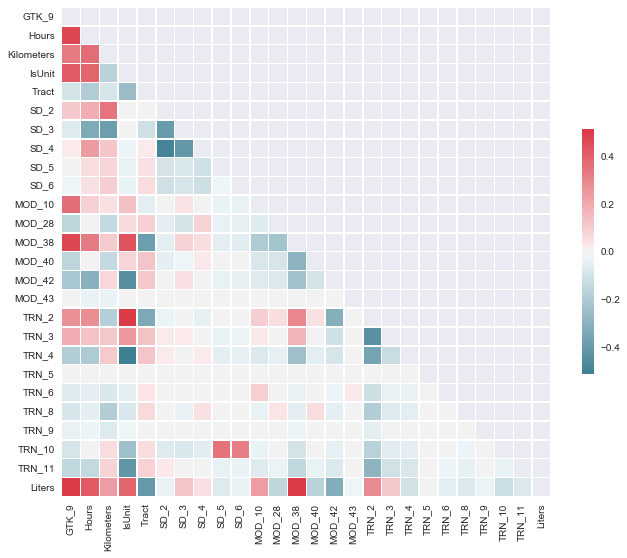

In [115]:
# Compute the correlation matrix
corr = coef.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f_, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Model selection using Cross-Validation

Now let's try to choose among the models of different sizes using cross-validation.
This approach is somewhat involved, as we must perform forward selection within each of the $k$ training sets. Despite this, we see that
with its clever subsetting syntax, ${\tt python}$ makes this job quite easy. First, we
create a vector that assigns each observation to one of $k = 10$ folds, and
we create a DataFrame in which we will store the results:

In order for the validation set approach to yield accurate estimates of the test
error, we must use *only the training observations* to perform all aspects of
model-fitting — including variable selection. Therefore, the determination of
which model of a given size is best must be made using *only the training
observations*. This point is subtle but important. If the full data set is used
to perform the best subset selection step, the validation set errors and
cross-validation errors that we obtain will not be accurate estimates of the
test error.

In [116]:
k=10        # number of folds
np.random.seed(seed=1)
folds = np.random.choice(k, size = len(Y_train), replace = True)

# Create a DataFrame to store the results of our upcoming calculations
cv_errors = pd.DataFrame(columns=range(1,k+1), index=range(1,26))
cv_errors = cv_errors.fillna(0)
#cv_errors

In [146]:
models_cv = pd.DataFrame(columns=["RSS", "model"])


# Outer loop iterates over all folds
for j in range(1,k+1):

    # Reset predictors
    predictors = []
    
    # Inner loop iterates over each size i
    for i in range(1,len(X.columns)+1):    
    
        # The perform forward selection on the full dataset minus the jth fold, test on jth fold

#        models_cv.loc[i] = forward(predictors, X_train[folds != (j-1)], Y_train[folds != (j-1)], X_train[folds == (j-1)], Y_train[folds == (j-1)])


        models_cv.loc[i] = forward(predictors, X_train[folds != (j-1)], Y_train[folds != (j-1)], X_train, Y_train)

        # Save the cross-validated error for this fold
        cv_errors[j][i] = models_cv.loc[i]["RSS"]

        # Extract the predictors
        predictors = models_cv.loc[i]["model"].model.exog_names
        #predictors = models_cv.loc[i]["model"].model.exog_names        

In [ ]:
#cv_errors

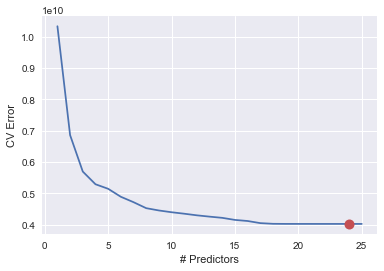

In [147]:
cv_mean = cv_errors.apply(np.mean, axis=1)

plt.plot(cv_mean)
plt.xlabel('# Predictors')
plt.ylabel('CV Error')
plt.plot(cv_mean.argmin(), cv_mean.min(), "or")

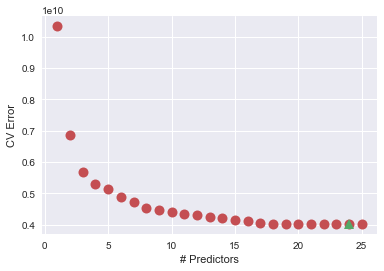

In [148]:
cv_mean = cv_errors.apply(np.mean, axis=1)

#plt.plot(cv_mean)
plt.xlabel('# Predictors')
plt.ylabel('CV Error')
plt.plot(cv_mean, "or")
plt.plot(cv_mean.argmin(), cv_mean.min(),  "g^")


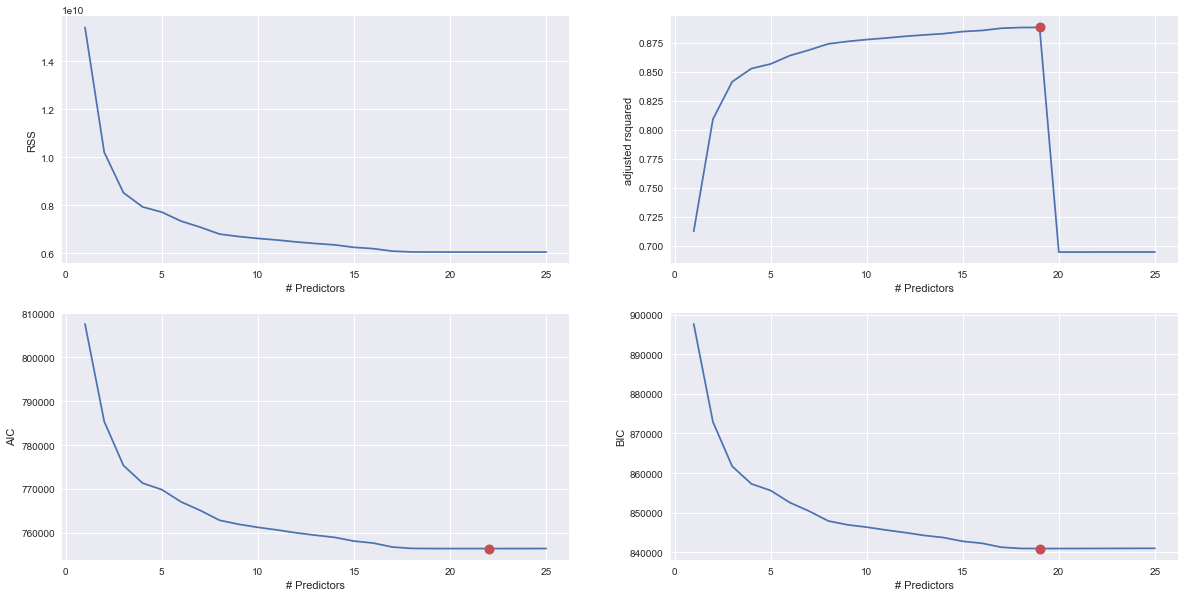

In [132]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_cv["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
rsquared = models_cv.apply(lambda row: row[1].rsquared, axis=1)
plt.subplot(2, 2, 2)
plt.plot(rsquared)
plt.plot(rsquared.argmax(), rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic

aic = models_cv.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')
bic = modelf_train.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

In [142]:
# In this case the forward or backward stepwise give the same predictors
print(modelf_train.loc[19, "model"].summary())
#print(modelb_train.loc[19, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                 Liters   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 2.515e+04
Date:                Sun, 20 Aug 2017   Prob (F-statistic):               0.00
Time:                        18:17:45   Log-Likelihood:            -4.2039e+05
No. Observations:               60285   AIC:                         8.408e+05
Df Residuals:                   60266   BIC:                         8.410e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
GTK_9       2016.0472     10.646    189.364      0.0

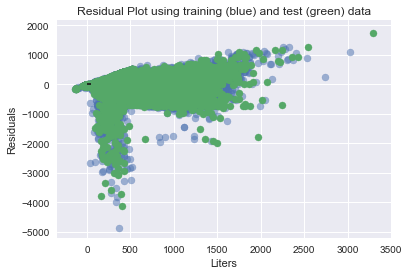

In [141]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=50, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=50)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')
plt.xlabel('Liters')

These funcitons on Ridge Regression and the Lasso is a Python adaptation of p. 251-255 of "Introduction to Statistical Learning with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani. Adapted by R. Jordan Crouser at Smith College for SDS293: Machine Learning (Spring 2016).

# Ridge Regression
The ${\tt Ridge()}$ function has an alpha argument ($\lambda$, but with a different name!) that is used to tune the model. We'll generate an array of alpha values ranging from very big to very small, essentially
covering the full range of scenarios from the null model containing
only the intercept, to the least squares fit:

In [149]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [150]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([  5.00000000e+09,   3.78231664e+09,   2.86118383e+09,
         2.16438064e+09,   1.63727458e+09,   1.23853818e+09,
         9.36908711e+08,   7.08737081e+08,   5.36133611e+08,
         4.05565415e+08,   3.06795364e+08,   2.32079442e+08,
         1.75559587e+08,   1.32804389e+08,   1.00461650e+08,
         7.59955541e+07,   5.74878498e+07,   4.34874501e+07,
         3.28966612e+07,   2.48851178e+07,   1.88246790e+07,
         1.42401793e+07,   1.07721735e+07,   8.14875417e+06,
         6.16423370e+06,   4.66301673e+06,   3.52740116e+06,
         2.66834962e+06,   2.01850863e+06,   1.52692775e+06,
         1.15506485e+06,   8.73764200e+05,   6.60970574e+05,
         5.00000000e+05,   3.78231664e+05,   2.86118383e+05,
         2.16438064e+05,   1.63727458e+05,   1.23853818e+05,
         9.36908711e+04,   7.08737081e+04,   5.36133611e+04,
         4.05565415e+04,   3.06795364e+04,   2.32079442e+04,
         1.75559587e+04,   1.32804389e+04,   1.00461650e+04,
         7.59955541e+03,

Associated with each alpha value is a vector of ridge regression coefficients, which we'll
store in a matrix ${\tt coefs}$. In this case, it is a $25 \times 100$
matrix, with 25 rows (one for each predictor) and 100
columns (one for each value of alpha). Remember that we'll want to standardize the
variables so that they are on the same scale. To do this, we can use the
${\tt normalize=True}$ parameter:

In [151]:
ridge = Ridge(normalize=True)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 25)

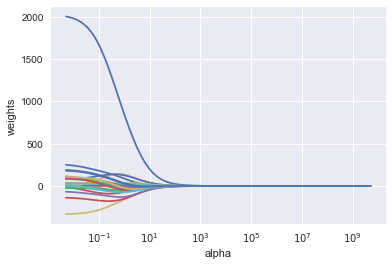

In [152]:
# As the alpha grows we expect the estimates are much lower
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [153]:
# Use the cross-validation package to split data into training and test sets
X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=1)

In [154]:
ridge2 = Ridge(alpha=4, normalize=True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index=X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))        # Calculate the test MSE

GTK_9         390.639444
Hours           6.390148
Kilometers      0.205341
IsUnit         23.604876
Tract         -78.605613
SD_2          -10.897146
SD_3           32.037114
SD_4            5.996329
SD_5          -35.419479
SD_6          -12.673785
MOD_10         75.681476
MOD_28        -41.700010
MOD_38         72.271382
MOD_40        -37.450104
MOD_42        -83.617121
MOD_43        -79.822007
TRN_2          29.847377
TRN_3          21.168047
TRN_4          -5.438642
TRN_5         -80.485137
TRN_6         -33.029898
TRN_8         -19.543109
TRN_9         -37.504907
TRN_10        -48.918749
TRN_11         -3.825503
dtype: float64
133970.471641


The test MSE when alpha = 4 is 133970. Now let's see what happens if we use a huge value of alpha, say $10^{10}$:

In [155]:
ridge3 = Ridge(alpha=10**10, normalize=True)
ridge3.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge3.coef_, index=X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred3))        # Calculate the test MSE

GTK_9         2.442111e-07
Hours         4.799327e-09
Kilometers    1.307469e-10
IsUnit        2.081015e-08
Tract        -5.129375e-08
SD_2         -3.366506e-09
SD_3          1.374996e-08
SD_4          4.410967e-09
SD_5         -2.108782e-08
SD_6         -9.957200e-09
MOD_10        4.947588e-08
MOD_28       -2.818413e-08
MOD_38        5.089362e-08
MOD_40       -2.527466e-08
MOD_42       -5.820861e-08
MOD_43       -5.443375e-08
TRN_2         2.728789e-08
TRN_3         1.680910e-08
TRN_4        -1.629486e-08
TRN_5        -5.132774e-08
TRN_6        -2.557192e-08
TRN_8        -2.087654e-08
TRN_9        -3.335648e-08
TRN_10       -3.762147e-08
TRN_11       -1.392964e-08
dtype: float64
221922.006176


Instead of arbitrarily choosing alpha, it would be better to
use cross-validation to choose the tuning parameter alpha. We can do this using
the cross-validated ridge regression function, ${\tt RidgeCV()}$. By default, the function
performs generalized cross-validation (an efficient form of LOOCV), though this can be changed using the
argument ${\tt cv}$.

In [156]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', normalize=True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.0050000000000000001

In [157]:
ridge4 = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

67137.835131890417

In [158]:
ridge5 = Ridge(alpha=0, normalize=True)
ridge5.fit(X_train, y_train)
mean_squared_error(y_test, ridge5.predict(X_test))

67116.052344168507

This does not represent an improvement over the test MSE that we got using
alpha $ = 0$. Finally, we refit our ridge regression model on the full data set,
using the value of alpha chosen by cross-validation, and examine the coefficient
estimates.

In [159]:
# alpha 0
ridge5.fit(X, y)
pd.Series(ridge5.coef_, index=X.columns)

GTK_9         2.027667e+03
Hours         7.401422e+00
Kilometers    2.843766e-01
IsUnit        2.004977e+13
Tract        -3.361740e+02
SD_2          2.853584e+01
SD_3          2.603157e+02
SD_4          1.258397e+02
SD_5         -4.721002e+00
SD_6          1.213550e+02
MOD_10       -6.618783e+00
MOD_28       -4.473496e+00
MOD_38        7.833836e+01
MOD_40       -2.356153e+01
MOD_42       -1.336911e+02
MOD_43       -6.143512e+01
TRN_2        -4.009954e+13
TRN_3        -4.009954e+13
TRN_4         1.947744e+02
TRN_5        -2.004977e+13
TRN_6        -2.004977e+13
TRN_8        -2.004977e+13
TRN_9        -2.004977e+13
TRN_10        1.207951e+01
TRN_11        1.873898e+02
dtype: float64

In [160]:
# alpha 0.005
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index=X.columns)

GTK_9         2003.032717
Hours            7.785208
Kilometers       0.300666
IsUnit          35.328740
Tract         -332.558523
SD_2            16.894534
SD_3           249.712055
SD_4           113.600028
SD_5           -16.724031
SD_6           108.365737
MOD_10           0.034130
MOD_28          -5.926695
MOD_38          81.575115
MOD_40         -24.392964
MOD_42        -138.484694
MOD_43         -68.147667
TRN_2           33.402358
TRN_3           32.593027
TRN_4          188.351684
TRN_5           81.458639
TRN_6           93.139145
TRN_8          104.110400
TRN_9          107.511860
TRN_10           5.924328
TRN_11         180.746748
dtype: float64


# The Lasso
We saw that ridge regression in this case even with a wise choice of alpha cannot outperform least
squares as well as the null model on fuel consumption data set. We now ask
whether the lasso can yield either a more accurate or a more interpretable
model than ridge regression. In order to fit a lasso model, we'll
use the ${\tt Lasso()}$ function; however, this time we'll need to include the argument ${\tt max_iter=10000}$.
Other than that change, we proceed just as we did in fitting a ridge model:

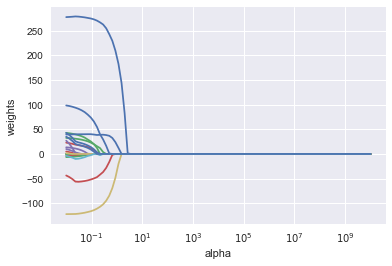

In [161]:
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

Notice that in the coefficient plot that depending on the choice of tuning
parameter, some of the coefficients are exactly equal to zero. We now
perform 10-fold cross-validation to choose the best alpha, refit the model, and compute the associated test error:

In [162]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

67129.560343072051

In [163]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

GTK_9         2022.024893
Hours            7.619251
Kilometers       0.277666
IsUnit          46.970527
Tract         -335.553351
SD_2            18.694827
SD_3           248.355588
SD_4           110.630045
SD_5           -13.750863
SD_6           112.101824
MOD_10          -0.000000
MOD_28          -1.643998
MOD_38          79.559746
MOD_40         -21.902579
MOD_42        -143.963663
MOD_43         -48.305065
TRN_2           -0.000000
TRN_3            0.741561
TRN_4          179.560894
TRN_5          -68.791743
TRN_6           73.418172
TRN_8           82.172185
TRN_9           72.396187
TRN_10          -2.195862
TRN_11         176.925960
dtype: float64

This is not lower than the test set MSE of the null model and of
least squares, and only a little worse than the test MSE of ridge regression with alpha
chosen by cross-validation.

However, the lasso could have a substantial advantage over ridge regression in
that the resulting coefficient estimates are sparse. Here we see that 2 of
the 25 coefficient estimates are exactly zero.  In this case it hasnt't, and neither the ridge or the lasso give us a better fit than the least squares with attribute selection:

In [164]:
# Let's use all the data again
f= fuel
f['Lts_x_GTK'] = ((f['Liters'] * 1000)/ (f['Gross_Ton_km'] / 1000000)).astype(float)
f['GTK_9'] = ((f['Gross_Ton_km'] / 1000000000)).astype(float)
# create six dummy variables for track_id using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(f.Track_id, prefix='SD').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
f = pd.concat([f, area_dummies], axis=1)

# create six dummy variables for Locomotive Type using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(f.Id_Model_Loc, prefix='MOD').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
f = pd.concat([f, area_dummies], axis=1)


# create six dummy variables for Train Type using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(f.Id_Sub_Type, prefix='TRN').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
f = pd.concat([f, area_dummies], axis=1)

# create a new Series called Tract - Number of Locomotives
f['Tract'] = f.Traccion.map({'S':1,'M':0})

# create a new Series called IsUnit
f['IsUnit'] = f.UTC.map({'UTR':1,'NUT':0,'PAS':-1})

In [165]:
#choose the predictor columns (X) with 19 predictors and the dependent variable (y) Liters
feature_cols = ['GTK_9', 'Hours', 'Kilometers', 'IsUnit', 'Tract','SD_2', 'SD_3', 'SD_4', 'SD_6', 
                'MOD_38', 'MOD_40', 'MOD_42', 
                'TRN_2', 'TRN_3', 'TRN_4', 'TRN_6', 'TRN_8', 'TRN_9', 'TRN_11']
X = f[feature_cols]
y = f.Liters

In [166]:
# Separate train and test set
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.33, random_state = 5)

In [167]:
# This creates a LinearRegression object with 19 selected variables
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [168]:
# The thing inside the "quotes" is called a formula
m = ols('Liters ~ GTK_9 + Hours + Kilometers + IsUnit + Tract + SD_2 + SD_3 + SD_4 + SD_6 + MOD_38 + MOD_40 + MOD_42 + TRN_2 + TRN_3 + TRN_4 + TRN_6 + TRN_8 + TRN_9 + TRN_11 ',f).fit()
#print (m.summary())

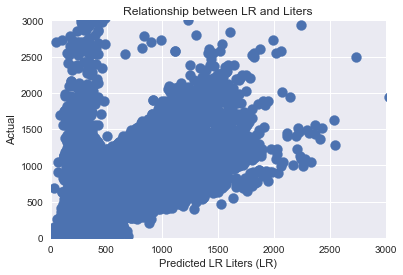

In [173]:
# Is the relationship linear
plt.scatter(m.fittedvalues, f.Liters)
plt.xlim( 0, 3000 ) 
plt.ylim( 0, 3000 ) 
plt.xlabel("Predicted LR Liters (LR)")
plt.ylabel("Actual")
plt.title("Relationship between LR and Liters")